##**Key Challenges in the UNSW-NB15 Dataset**
1. Noisy Data: Irrelevant information, inconsistent formatting, and duplicate records make it difficult for machine learning models to distinguish between normal and malicious traffic.
2. Missing Data: Some rows may contain missing or incomplete data, which must be handled carefully to avoid degrading model performance.
3. Imbalanced Data: The dataset has a large proportion of normal traffic compared to malicious activity. This imbalance can bias models toward classifying traffic as normal, missing the minority-class attacks.

##**Step 1: Cleaning and Preprocessing the Data**
###1.1. Handling Missing Data

Missing data is a frequent issue in cybersecurity datasets. In the UNSW-NB15 dataset, certain fields such as attack references or source/destination ports may be incomplete. A simple yet effective approach to handle missing data is using forward and backward filling.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/NUSW-NB15_GT(in).csv')
print(df.head())

     Start time     Last time Attack category   Attack subcategory Protocol  \
0  1.421927e+09  1.421927e+09  Reconnaissance                 HTTP      tcp   
1  1.421927e+09  1.421927e+09        Exploits     Unix 'r' Service      udp   
2  1.421927e+09  1.421927e+09        Exploits              Browser      tcp   
3  1.421927e+09  1.421927e+09        Exploits  Miscellaneous Batch      tcp   
4  1.421927e+09  1.421927e+09        Exploits           Cisco IOS       tcp   

      Source IP  Source Port  Destination IP  Destination Port  \
0  175.45.176.0      13284.0  149.171.126.16              80.0   
1  175.45.176.3      21223.0  149.171.126.18           32780.0   
2  175.45.176.2      23357.0  149.171.126.16              80.0   
3  175.45.176.2      13792.0  149.171.126.16            5555.0   
4  175.45.176.2      26939.0  149.171.126.10              80.0   

                                         Attack Name  \
0  Domino Web Server Database Access: /doladmin.n...   
1  Solaris rwall

In [ ]:
df.shape

(174348, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174348 entries, 0 to 174347
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Start time          174347 non-null  float64
 1   Last time           174347 non-null  float64
 2   Attack category     174348 non-null  object 
 3   Attack subcategory  170250 non-null  object 
 4   Protocol            174347 non-null  object 
 5   Source IP           174347 non-null  object 
 6   Source Port         174347 non-null  float64
 7   Destination IP      174347 non-null  object 
 8   Destination Port    174347 non-null  float64
 9   Attack Name         174346 non-null  object 
 10  Attack Reference    123709 non-null  object 
 11  .                   174346 non-null  object 
dtypes: float64(4), object(8)
memory usage: 16.0+ MB


In [ ]:
df.describe()

,Start time,Last time,Source Port,Destination Port
count,1.743470e+05,1.743470e+05,174347.000000,174347.000000
mean,1.424045e+09,1.424045e+09,15390.600710,1304.554526
std,6.435399e+05,6.435402e+05,21707.638236,7465.911059
min,1.421927e+09,1.421927e+09,0.000000,0.000000
25%,1.424229e+09,1.424229e+09,0.000000,0.000000
50%,1.424238e+09,1.424238e+09,0.000000,0.000000
75%,1.424252e+09,1.424252e+09,31855.500000,80.000000
max,1.424262e+09,1.424262e+09,65535.000000,65535.000000


In [ ]:
# Check for missing values
print(df.isnull().sum())

Start time                1
Last time                 1
Attack category           0
Attack subcategory     4098
Protocol                  1
Source IP                 1
Source Port               1
Destination IP            1
Destination Port          1
Attack Name               2
Attack Reference      50639
.                         2
dtype: int64


In [ ]:
# Fill missing values using forward fill, followed by backward fill
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

<ipython-input-6-67b6ba888a01>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-6-67b6ba888a01>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [ ]:
# Check for missing values
print(df.isnull().sum())

Start time            0
Last time             0
Attack category       0
Attack subcategory    0
Protocol              0
Source IP             0
Source Port           0
Destination IP        0
Destination Port      0
Attack Name           0
Attack Reference      0
.                     0
dtype: int64


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values using forward fill, followed by backward fill
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

This ensures that gaps in the data are filled using the most recent known values, preventing incomplete records from affecting the analysis.

###1.2. Removing Duplicate Records

Duplicates are common in network logs, especially when the same event is recorded by different monitoring systems. Identifying and removing these duplicates is essential for clean data.

In [ ]:
# Drop duplicate rows based on all columns
df = df.drop_duplicates()

# Check if duplicates have been removed
print(f"Data after removing duplicates: {df.shape}")


Data after removing duplicates: (174342, 12)


This reduces the noise from redundant entries in the dataset.

###1.3. Standardizing Timestamps

In cybersecurity, logs from different systems may use different timestamp formats or time zones. Standardizing timestamps to a common format, such as UTC, is crucial for correlating events across systems.

In [ ]:
# Convert the timestamp column to a datetime object and standardize to UTC
df['Start time'] = pd.to_datetime(df['Start time'], unit='s').dt.tz_localize('UTC')
df['Last time'] = pd.to_datetime(df['Last time'], unit='s').dt.tz_localize('UTC')

# Verify the conversion
print(df[['Start time', 'Last time']].head())


                 Start time                 Last time
0 2015-01-22 11:50:14+00:00 2015-01-22 11:50:16+00:00
1 2015-01-22 11:50:15+00:00 2015-01-22 11:50:15+00:00
2 2015-01-22 11:50:16+00:00 2015-01-22 11:50:16+00:00
3 2015-01-22 11:50:17+00:00 2015-01-22 11:50:17+00:00
4 2015-01-22 11:50:18+00:00 2015-01-22 11:50:18+00:00


This ensures that all timestamps are consistent, enabling accurate event correlation.

##**Step 2: Feature Engineering and Dimensionality Reduction**
###2.1. Feature Engineering

To make the data more useful for machine learning models, we can create additional features. For example, we can calculate the duration of each connection by subtracting the "Start time" from the "Last time" of each record.

In [ ]:
# Create a new feature: Connection duration
df['Duration'] = (df['Last time'] - df['Start time']).dt.total_seconds()

# Display the new feature
print(df[['Start time', 'Last time', 'Duration']].head())


                 Start time                 Last time  Duration
0 2015-01-22 11:50:14+00:00 2015-01-22 11:50:16+00:00       2.0
1 2015-01-22 11:50:15+00:00 2015-01-22 11:50:15+00:00       0.0
2 2015-01-22 11:50:16+00:00 2015-01-22 11:50:16+00:00       0.0
3 2015-01-22 11:50:17+00:00 2015-01-22 11:50:17+00:00       0.0
4 2015-01-22 11:50:18+00:00 2015-01-22 11:50:18+00:00       0.0


###2.2. Dimensionality Reduction Using PCA

The dataset contains numerous features, but not all of them may be relevant to detecting attacks. Principal Component Analysis (PCA) can be used to reduce the dimensionality of the data while preserving the most important information.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select relevant numeric features for PCA
features = ['Source Port', 'Destination Port', 'Duration']
X = df[features].fillna(0)  # Handle missing values

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Add the PCA results back to the dataframe
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

print(df[['PCA1', 'PCA2']].head())


       PCA1      PCA2
0 -0.151177 -0.119653
1  2.860571  1.833079
2  0.251326 -0.265181
3  0.400241  0.047909
4  0.363347 -0.250311


This reduces noise from irrelevant features, allowing the model to focus on the most critical data points.

##**Step 3: Handling Imbalanced Data**
One of the biggest challenges in the UNSW-NB15 dataset is the class imbalance between normal traffic and attacksn Imbalance can cause machine learning models to become biased toward the majority class, resulting in poor detection of minority-class attacks

###Techniques to Handle Imbalanced Data:
1. Oversampling the Minority Class (e.g., SMOTE): Synthetic Minority Over-sampling Technique (SMOTE) generates synthetic samples to balance the classes.

In [ ]:
from collections import Counter

print(Counter(y))  # Check the class distribution


Counter({'Exploits': 68211, ' Fuzzers ': 29503, 'DoS': 24582, 'Generic': 19860, ' Reconnaissance ': 18392, ' Fuzzers': 4135, 'Backdoor': 4097, 'Analysis': 1881, 'Reconnaissance': 1744, ' Shellcode ': 1288, 'Backdoors': 256, 'Shellcode': 223, 'Worms': 169, '.': 1})


The output of Counter(y) shows the class distribution in your dataset. Based on this, you can see that the smallest class, represented by '.', has only 1 sample, and there are multiple variations of similar labels (e.g., ' Fuzzers ' and 'Fuzzers', ' Shellcode ' and 'Shellcode'). This could be contributing to the issue, and label cleaning might be necessary before applying SMOTE.

Steps:
Clean up labels: It seems that some of your labels have extra spaces. You'll want to clean the label names before continuing. This can be done as follows:

In [ ]:
# Strip whitespace from the labels
df['Attack category'] = df['Attack category'].str.strip()

# Recheck the class distribution after cleaning
y = df['Attack category']
print(Counter(y))


Counter({'Exploits': 68211, 'Fuzzers': 33638, 'DoS': 24582, 'Reconnaissance': 20136, 'Generic': 19860, 'Backdoor': 4097, 'Analysis': 1881, 'Shellcode': 1511, 'Backdoors': 256, 'Worms': 169, '.': 1})


Handle classes with very few samples: The class '.' has only 1 sample, which will cause issues with SMOTE. SMOTE cannot oversample a class with fewer than 2 samples when k_neighbors=1. You can either:

Remove this class from your dataset if it's not meaningful or too small to generalize.


In [ ]:
# Strip whitespace from the labels
df['Attack category'] = df['Attack category'].str.strip()
# Remove rows with label '.'
df = df[df['Attack category'] != '.']
y = df['Attack category']

In [ ]:
print(Counter(y))

Counter({'Exploits': 68211, 'Fuzzers': 33638, 'DoS': 24582, 'Reconnaissance': 20136, 'Generic': 19860, 'Backdoor': 4097, 'Analysis': 1881, 'Shellcode': 1511, 'Backdoors': 256, 'Worms': 169})


Determine k_neighbors: After cleaning up the labels and addressing classes with very few samples, you can now determine the appropriate k_neighbors for SMOTE. For the minority classes like 'Worms' (169 samples) or 'Shellcode' (223 samples), you could use a smaller k_neighbors value, such as 2 or 3.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Features and labels
X = df[['Source Port', 'Destination Port', 'Duration', 'PCA1', 'PCA2']]
y = df['Attack category']

# Set k_neighbors according to the smallest class size
smote = SMOTE(sampling_strategy='minority', k_neighbors=2)  # Set to a value <= 168 (Worms - 1)

# Apply SMOTE
X_res, y_res = smote.fit_resample(X, y)

# Check the new shape
print(f"After SMOTE: {X_res.shape}, {y_res.shape}")
print(Counter(y_res))  # Check the new class distribution after SMOTE


After SMOTE: (242383, 5), (242383,)
Counter({'Exploits': 68211, 'Worms': 68211, 'Fuzzers': 33638, 'DoS': 24582, 'Reconnaissance': 20136, 'Generic': 19860, 'Backdoor': 4097, 'Analysis': 1881, 'Shellcode': 1511, 'Backdoors': 256})


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Features and labels
X = df[['Source Port', 'Destination Port', 'Duration', 'PCA1', 'PCA2']]
y = df['Attack category']

# Set k_neighbors according to the smallest class size
smote = SMOTE(sampling_strategy='minority', k_neighbors=3)  # Set to a value <= 168 (Worms - 1)

# Apply SMOTE
X_res, y_res = smote.fit_resample(X, y)

# Check the new shape
print(f"After SMOTE: {X_res.shape}, {y_res.shape}")
print(Counter(y_res))  # Check the new class distribution after SMOTE


After SMOTE: (242383, 5), (242383,)
Counter({'Exploits': 68211, 'Worms': 68211, 'Fuzzers': 33638, 'DoS': 24582, 'Reconnaissance': 20136, 'Generic': 19860, 'Backdoor': 4097, 'Analysis': 1881, 'Shellcode': 1511, 'Backdoors': 256})


In [ ]:
# Define how many samples you want for each class
sampling_strategy = {
    'Exploits': 68211,   # Keep the same
    'Worms': 50000,      # Oversample Worms to 50,000
    'Fuzzers': 33638,    # Keep the same
    'DoS': 24582,        # Keep the same
    'Reconnaissance': 20136,  # Keep the same
    'Generic': 19860,    # Keep the same
    'Backdoor': 10000,   # Oversample Backdoor to 10,000
    'Analysis': 5000,    # Oversample Analysis to 5,000
    'Shellcode': 3000,   # Oversample Shellcode to 3,000
    'Backdoors': 1000    # Oversample Backdoors to 1,000
}

# Apply SMOTE with the custom sampling strategy
smote = SMOTE(sampling_strategy=sampling_strategy, k_neighbors=2)
X_res, y_res = smote.fit_resample(X, y)

# Check the new class distribution
print(Counter(y_res))


Counter({'Exploits': 68211, 'Worms': 50000, 'Fuzzers': 33638, 'DoS': 24582, 'Reconnaissance': 20136, 'Generic': 19860, 'Backdoor': 10000, 'Analysis': 5000, 'Shellcode': 3000, 'Backdoors': 1000})


2. Handling Temporal Data with Window Functions: Use rolling windows and time-based aggregations to detect patterns like brute-force attacks that span multiple connections over a certain period.

In [ ]:
# Convert the 'Start time' column to datetime from Unix timestamp
df['Start time'] = pd.to_datetime(df['Start time'], unit='s')

# Set 'Start time' as the index for time-based operations
df.set_index('Start time', inplace=True)

# Create a column for Failed Logins (assuming 'BruteForce' is the label for failed logins)
df['Failed Logins'] = df['Attack category'] == 'BruteForce'

# Use resample to create 10-minute windows and sum the failed logins
rolling_window = df['Failed Logins'].resample('10T').sum()

# Print the result
print(rolling_window.head())


Start time
2015-01-22 11:50:00+00:00    0
2015-01-22 12:00:00+00:00    0
2015-01-22 12:10:00+00:00    0
2015-01-22 12:20:00+00:00    0
2015-01-22 12:30:00+00:00    0
Freq: 10T, Name: Failed Logins, dtype: int64


3. Correlation-Based Feature Selection: Instead of relying on simple dimensionality reduction, introduce more complex techniques like correlation analysis or mutual information to understand the relationships between features.

<Axes: >

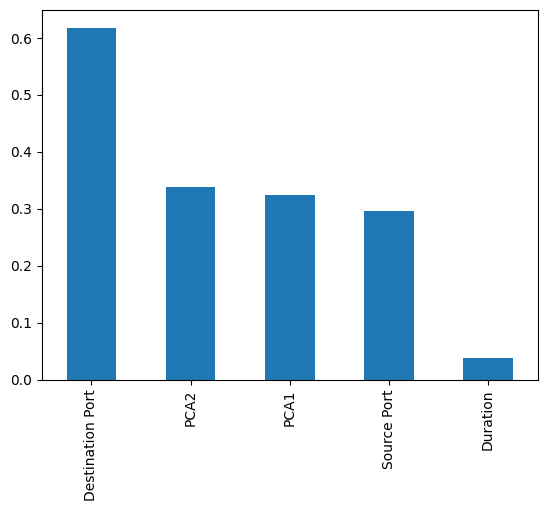

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# Calculate mutual information for feature importance
mutual_info = mutual_info_classif(X, y)
important_features = pd.Series(mutual_info, index=X.columns)
important_features.sort_values(ascending=False).plot(kind='bar')


4. Advanced Handling of Imbalanced Data: Beyond SMOTE, include techniques like Adaptive Synthetic (ADASYN) sampling or Ensemble methods such as Balanced Random Forests to address the class imbalance problem. Also, dive into cost-sensitive algorithms, which penalize models for misclassifying minority classes (i.e., attacks).

In [ ]:
from imblearn.over_sampling import ADASYN
# Applying ADASYN to the dataset
adasyn = ADASYN(sampling_strategy='minority')
X_res, y_res = adasyn.fit_resample(X, y)
print(f"After ADASYN: {X_res.shape}, {y_res.shape}")


After ADASYN: (242321, 5), (242321,)


5. Ensemble Techniques to Handle Imbalance: Introduce ensemble learning techniques like Balanced Random Forests or XGBoost with built-in class weighting to handle imbalance dynamically within the model structure.

Set Up XGBoost with scale_pos_weight:
This parameter will penalize misclassifications of the minority class (attacks), helping the model focus on detecting intrusions.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Drop irrelevant columns
df_cleaned = df.drop(columns=['Last time', 'Attack Name', 'Attack Reference', '.'])

# Convert categorical columns using one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=['Attack subcategory', 'Protocol', 'Source IP', 'Destination IP'])

# Define features and target
X = df_encoded.drop('Attack category', axis=1)  # Features
y = df_encoded['Attack category']  # Target

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Calculate the imbalance ratio for the encoded labels
class_counts = pd.Series(y_encoded).value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()

# Initialize the XGBoost model with scale_pos_weight to handle imbalance
xgb = XGBClassifier(scale_pos_weight=imbalance_ratio, use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:26:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

Calculate the Imbalance Ratio:
This ratio will be used to set the weight for the minority class (attacks).

In [ ]:
print(df['Attack category'].unique())


['Reconnaissance' 'Exploits' 'DoS' 'Generic' 'Shellcode' 'Fuzzers' 'Worms'
 'Backdoors' 'Analysis' 'Backdoor']


In [ ]:
# Define categories
normal_category = 'Normal'  # Replace this with the actual normal traffic category if applicable
attack_categories = ['Reconnaissance', 'Exploits', 'DoS', 'Generic', 'Shellcode', 'Fuzzers', 'Worms', 'Backdoors', 'Analysis', 'Backdoor']

# Count normal and attack traffic
normal_count = len(df[df['Attack category'] == normal_category])
attack_count = len(df[df['Attack category'].isin(attack_categories)])

# Calculate the imbalance ratio
imbalance_ratio = normal_count / attack_count if attack_count != 0 else float('inf')  # Handle division by zero

print(f"Imbalance ratio (Normal:Attack): {imbalance_ratio}")


Imbalance ratio (Normal:Attack): 0.0


In [ ]:
# Print the counts for each category
print(df['Attack category'].value_counts())


Attack category
Exploits          68211
Fuzzers           33638
DoS               24582
Reconnaissance    20136
Generic           19860
Backdoor           4097
Analysis           1881
Shellcode          1511
Backdoors           256
Worms               169
Name: count, dtype: int64


In [ ]:
# Print the distribution of attack types
attack_distribution = df['Attack category'].value_counts()
print("Attack Category Distribution:")
print(attack_distribution)


Attack Category Distribution:
Attack category
Exploits          68211
Fuzzers           33638
DoS               24582
Reconnaissance    20136
Generic           19860
Backdoor           4097
Analysis           1881
Shellcode          1511
Backdoors           256
Worms               169
Name: count, dtype: int64


In [ ]:
# Normalize the distribution
attack_distribution_normalized = attack_distribution / attack_distribution.sum()
print("Normalized Attack Category Distribution:")
print(attack_distribution_normalized)


Normalized Attack Category Distribution:
Attack category
Exploits          0.391250
Fuzzers           0.192944
DoS               0.141000
Reconnaissance    0.115498
Generic           0.113915
Backdoor          0.023500
Analysis          0.010789
Shellcode         0.008667
Backdoors         0.001468
Worms             0.000969
Name: count, dtype: float64


Insights and Next Steps
Understand Data Imbalance:

The high proportion of categories like Exploits and Fuzzers compared to the very low proportion of categories like Worms and Backdoors indicates a significant class imbalance.
Modeling Considerations:

Sampling Techniques: Consider techniques such as oversampling the rare categories or undersampling the more frequent ones to address class imbalance in your models.
Class Weights: Some models, such as certain classifiers, allow you to set class weights to account for imbalances directly.
Analysis and Visualization:

Visualize Distribution: Create plots (e.g., bar charts or pie charts) to visualize the distribution of attack types. This can help in understanding the dataset better.
Feature Engineering: Analyze if certain features are more informative for specific attack types and consider feature engineering based on attack distribution.

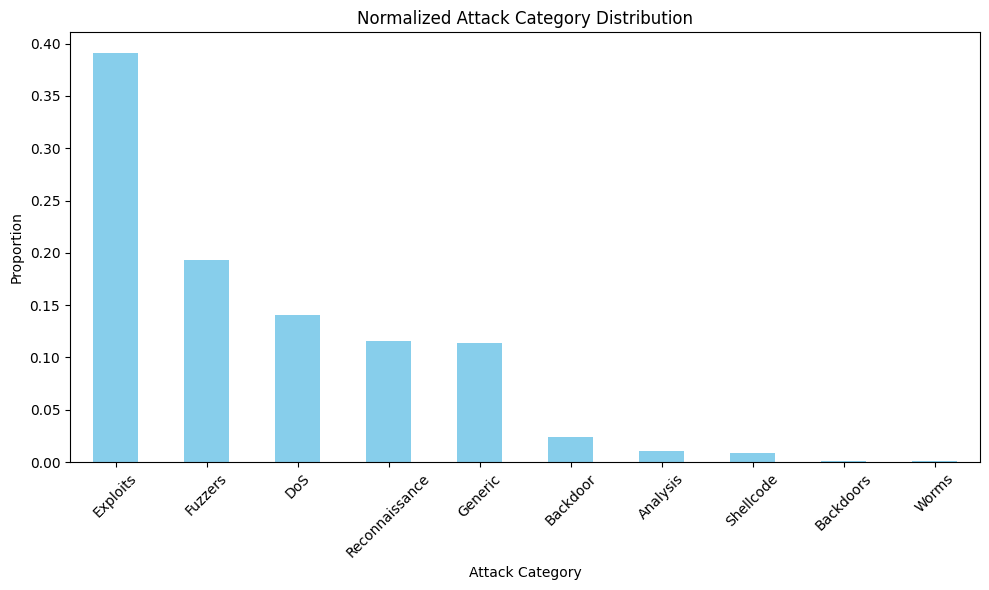

In [ ]:
import matplotlib.pyplot as plt

# Plot the normalized attack distribution
plt.figure(figsize=(10, 6))
attack_distribution_normalized.plot(kind='bar', color='skyblue')
plt.title('Normalized Attack Category Distribution')
plt.xlabel('Attack Category')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = xgb.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.44      0.61       547
           1       0.76      0.93      0.84      1193
           2       0.94      0.99      0.96        75
           3       0.87      0.45      0.59      7400
           4       0.85      0.95      0.89     20510
           5       0.98      0.99      0.98      9966
           6       0.99      1.00      0.99      6061
           7       0.83      0.98      0.90      6048
           8       1.00      1.00      1.00       456
           9       0.98      0.89      0.93        47

    accuracy                           0.89     52303
   macro avg       0.92      0.86      0.87     52303
weighted avg       0.89      0.89      0.88     52303

[[  239   305     0     0     3     0     0     0     0     0]
 [    3  1106     0     3    20     2    16    43     0     0]
 [    0     0    74     0     0     0     0     0     0     1]
 [    0     7     0  3309  3495    18     4   565   

In [ ]:
# Step 7:
from imblearn.ensemble import BalancedRandomForestClassifier
clf = BalancedRandomForestClassifier(n_estimators=100)
clf.fit(X_res, y_res)


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


BalancedRandomForestClassifier()

In [ ]:
# Step 8: Model Evaluation
y_pred = xgb.predict(X_test)

# Classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.44      0.61       547
           1       0.76      0.93      0.84      1193
           2       0.94      0.99      0.96        75
           3       0.87      0.45      0.59      7400
           4       0.85      0.95      0.89     20510
           5       0.98      0.99      0.98      9966
           6       0.99      1.00      0.99      6061
           7       0.83      0.98      0.90      6048
           8       1.00      1.00      1.00       456
           9       0.98      0.89      0.93        47

    accuracy                           0.89     52303
   macro avg       0.92      0.86      0.87     52303
weighted avg       0.89      0.89      0.88     52303

Confusion Matrix:
 [[  239   305     0     0     3     0     0     0     0     0]
 [    3  1106     0     3    20     2    16    43     0     0]
 [    0     0    74     0     0     0     0     0     0     1]
 [    0  